In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rn
import math
from collections import Counter

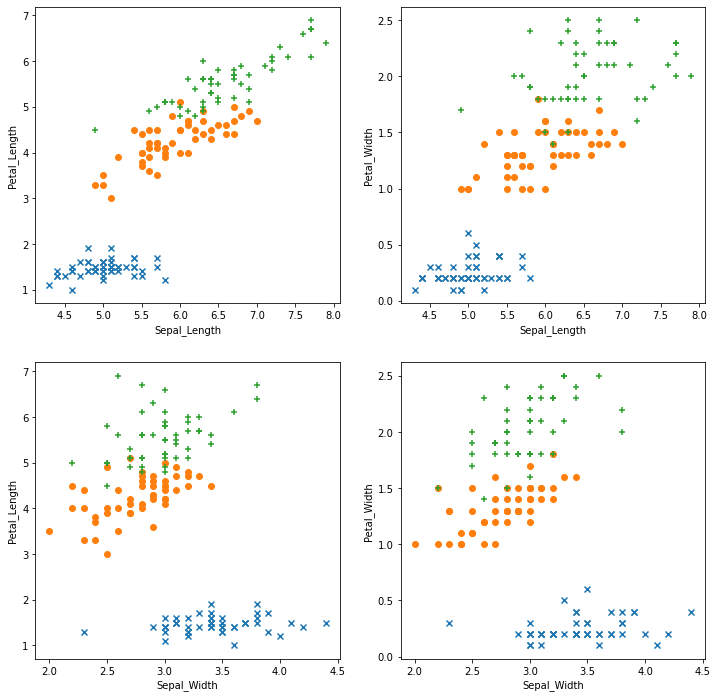

In [70]:
def plot_iris(iris):
    '''Function to plot iris data by type'''
    setosa = iris[iris['Species'] == 'setosa']
    versicolor = iris[iris['Species'] == 'versicolor']
    virginica = iris[iris['Species'] == 'virginica']
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    for i in range(2):
        for j in range(2):
            ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = 'x')
            ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = 'o')
            ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = '+')
            ax[i,j].set_xlabel(x_ax[i])
            ax[i,j].set_ylabel(y_ax[j])
            
            
iris = datasets.load_iris()

species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species

plot_iris(iris)

In [71]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [72]:
color = []
for i in iris.Species:
    if i == 'setosa':
        color.append(0)
    if i == 'virginica':
        color.append(0.5)
    if i == 'versicolor':
        color.append(1)


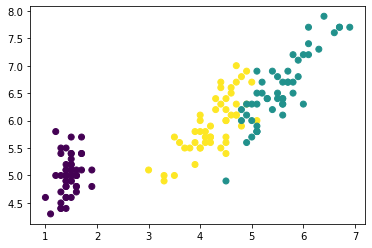

In [73]:
plt.scatter(iris.Petal_Length,iris.Sepal_Length, c = color)

In [74]:
tdata = np.array((iris.Petal_Length,iris.Sepal_Length,color))
tdata = tdata.T

In [75]:
def sig_act(s):
    return 1.0/(1.0+math.exp(-s))

def sig_act_prime(s):
    return math.exp(-s)/(1.0+math.exp(-s))**2

def p_force(theta):

# Calculate negative gradient of L2 loss function (and the loss) for 
# a two input function modelled with a two layer (2 hidden node) network
# using sigmoidal activation
# input - parameter vector *theta*
# output - negative gradient of L2 loss *F* and *loss*

    #change to weight, bias notation
    w11 = theta[0]; w12 = theta[1]; w21 = theta[2]; w22 =theta[3]
    w31 = theta[4]; w32 = theta[5]; b1 = theta[6]; b2=theta[7]; b3=theta[8]
    g = np.zeros((9,1));           # g = gradient - start with a zero vector 
    loss = 0                       # training loss

    for i in range(len(tdata)):
        x1 = tdata[i][0]; x2 = tdata[i][1]; c = tdata[i][2];
   
        # calculate intermediates and output of network
        u1 = w11*x1 + w12*x2 + b1
        u2 = w21*x1 + w22*x2 + b2
      
        z1 = sig_act(u1)            # hidden node outputs
        z2 = sig_act(u2)
        u3 = w31*z1 + w32*z2 +b3    # 2nd layer
        
        out = sig_act(u3)
        res = c-out
        loss = loss + res**2        # update the L2 loss
        
        # now calculate the loss gradient components in reverse order
        h3 = -2*res*sig_act_prime(u3) 
        
        g[8] += h3                  # deriv with respect to bias b3
        g[5] += h3*z2               # wrt w32
        g[4] += h3*z1               # wrt w31
        
        h2 = h3* sig_act_prime(u2)  # multipliers
        h1 = h3* sig_act_prime(u1)
        
        g[7] += h2*w32              # wrt b2
        g[6] += h1*w31              # wrt b1
        g[3] += h2*w32*x2           # wrt w22
        g[2] += h2*w32*x1           # wrt w21
        g[1] += h1*w31*x2           # wrt w12
        g[0] += h1*w31*x1           # wrt w11

# negate the gradient to get the descent direction

    F = -g

    return F,loss

In [77]:
theta = np.zeros((9,1))
F, loss = p_force(theta)
print("Gradient vector in case a:",F)
print("Loss in case a:",loss)
theta = np.asarray([0,0,0,0,0,2*np.log(3),100,0,0])
F, loss = p_force(theta)
print("Gradient vector in case b:",F)
print("Loss in case b:",loss)

Gradient vector in case a: [[-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]]
Loss in case a: 25.0
Gradient vector in case b: [[ -0.        ]
 [ -0.        ]
 [-14.62012635]
 [-40.34825288]
 [-14.0625    ]
 [ -7.03125   ]
 [ -0.        ]
 [ -7.72461765]
 [-14.0625    ]]
Loss in case b: 34.375


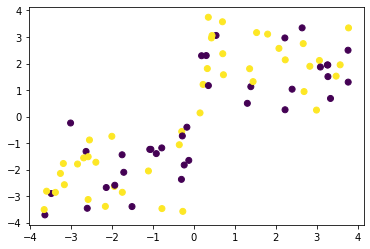

In [3]:
no = 20


#create Data of two point clouds in the plane with center (1,1) and (-1,-1)
n = 50
#c1 = np.array([1+np.random.randn(n), 1+np.random.randn(n)])
c1 = np.random.normal(1, 0.5, (50, 2))
c1 = np.hstack((c1, np.ones((50,1))))

c2 = np.random.normal(-1, 0.5, (50, 2))
c2 = np.hstack((c2, np.zeros((50,1))))


rn.seed(64)

centralpoints = [[2,2],[1.9,1.9],[-2,-2],[-1.9,-1.9]]

points = []

for n in range(no):
    for i in centralpoints:
        points.append([rn.choice([-1.8,1.8])*rn.random()+i[0],rn.choice([-1.8,1.8])*rn.random()+i[1]])

points = np.array(points)

labels = []
for i in range(no*4):
    labels.append(rn.choice([0,1]))

plt.scatter(points[:,0],points[:,1],c = labels)

In [103]:
#line
#y = w0 + w1x

weights = np.array([0.1,0.1])
learning_rate = 0.3

def step(x):
    if x>0:
        return 1
    else:
        return 0

def neuron(weights,data):
    weighted_input = weights * data
    weighted_sum = weighted_input.sum()
    return step(weighted_sum)

def adjust(weights,target,calc,data):
    error = target - calc
    if error != 0:
        correction = error * data * learning_rate
        weights += correction
        
def evaluate(data,labels):
    evaluation = Counter()
    for i in range(len(data)):
        label = int(round(neuron(weights,data[i]),0))
        if label == labels[i]:
            evaluation["correct"] += 1
        else:
            evaluation["wrong"] += 1
        return evaluation
            
for i in range(len(points)):
    adjust(weights,labels[i],neuron(weights,points[i]),points[i])
    
evaluation = evaluate(points,labels)

print(evaluation, " ", weights)

Counter({'correct': 1})   [-0.69655517 -0.55315923]


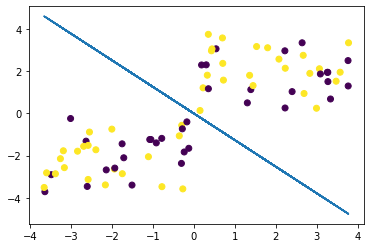

In [104]:
m = -weights[0]/weights[1]
plt.plot(points[:,0],m*points[:,0])
plt.scatter(points[:,0],points[:,1],c = labels)

In [100]:
tdata[:,1]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])